In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Manual extraction:


- Company names: Microsoft, Tesla, Apple


- For each company, find the 10-K filings for the last three fiscal years.

- Extract the following financial figures: Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.

- Link: https://www.sec.gov/edgar/searchedgar/cik

In [5]:
df=pd.read_csv("Extracted_data.csv")

In [6]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company
0,2023,211915,72361,411976,205753,87582,Microsoft
1,2022,198270,72738,364840,198298,89035,Microsoft
2,2021,168088,61271,333779,191791,76740,Microsoft
3,2023,96773,14974,106618,43009,13256,Tesla
4,2022,81462,12556,82338,36440,14724,Tesla
5,2021,53821,5519,62131,30548,11497,Tesla
6,2023,383285,96995,352583,290437,110543,Apple
7,2022,394328,99803,352755,302083,122151,Apple
8,2021,365817,94680,351002,287912,104038,Apple


 Calculating Year-by-Year growth rates for **Total Revenue** and Net **Income**


In [7]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

In [8]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,NaN,NaN
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800
3,2023,96773,14974,106618,43009,13256,Tesla,NaN,NaN
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919
6,2023,383285,96995,352583,290437,110543,Apple,NaN,NaN
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112


In [9]:
df.fillna(0, inplace=True)

In [19]:
df

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Company,Revenue Growth (%),Net Income Growth (%)
0,2023,211915,72361,411976,205753,87582,Microsoft,0.000000,0.000000
1,2022,198270,72738,364840,198298,89035,Microsoft,-6.438902,0.520999
2,2021,168088,61271,333779,191791,76740,Microsoft,-15.222676,-15.764800
3,2023,96773,14974,106618,43009,13256,Tesla,0.000000,0.000000
4,2022,81462,12556,82338,36440,14724,Tesla,-15.821562,-16.147990
5,2021,53821,5519,62131,30548,11497,Tesla,-33.931158,-56.044919
6,2023,383285,96995,352583,290437,110543,Apple,0.000000,0.000000
7,2022,394328,99803,352755,302083,122151,Apple,2.881146,2.894995
8,2021,365817,94680,351002,287912,104038,Apple,-7.230275,-5.133112


In [10]:
# Aggregating by company to have an understanding of the total 
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
summary


Year-over-Year Average Growth Rates (%):


,Company,Revenue Growth (%),Net Income Growth (%)
0,Apple,-1.449710,-0.746039
1,Microsoft,-7.220526,-5.081267
2,Tesla,-16.584240,-24.064303


In [15]:
# Aggregating by Time to have an understanding of the total trend
overall_trends = df.groupby(['Year']).agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Total Assets': 'sum',
    'Total Liabilities': 'sum',
    'Cash Flow from Operating Activities': 'sum'
}).reset_index()

print(" \n Overall trend over year for all company altogether :")

overall_trends

 
 Overall trend over year for all company altogether :


,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,2021,587726,161470,746912,510251,192275
1,2022,674060,185097,799933,536821,225910
2,2023,691973,184330,871177,539199,211381


#### Visual data are clearly best suited to understand the trend over the years so lets plot a simple graph with available data. 

In [16]:
import matplotlib.pyplot as plt

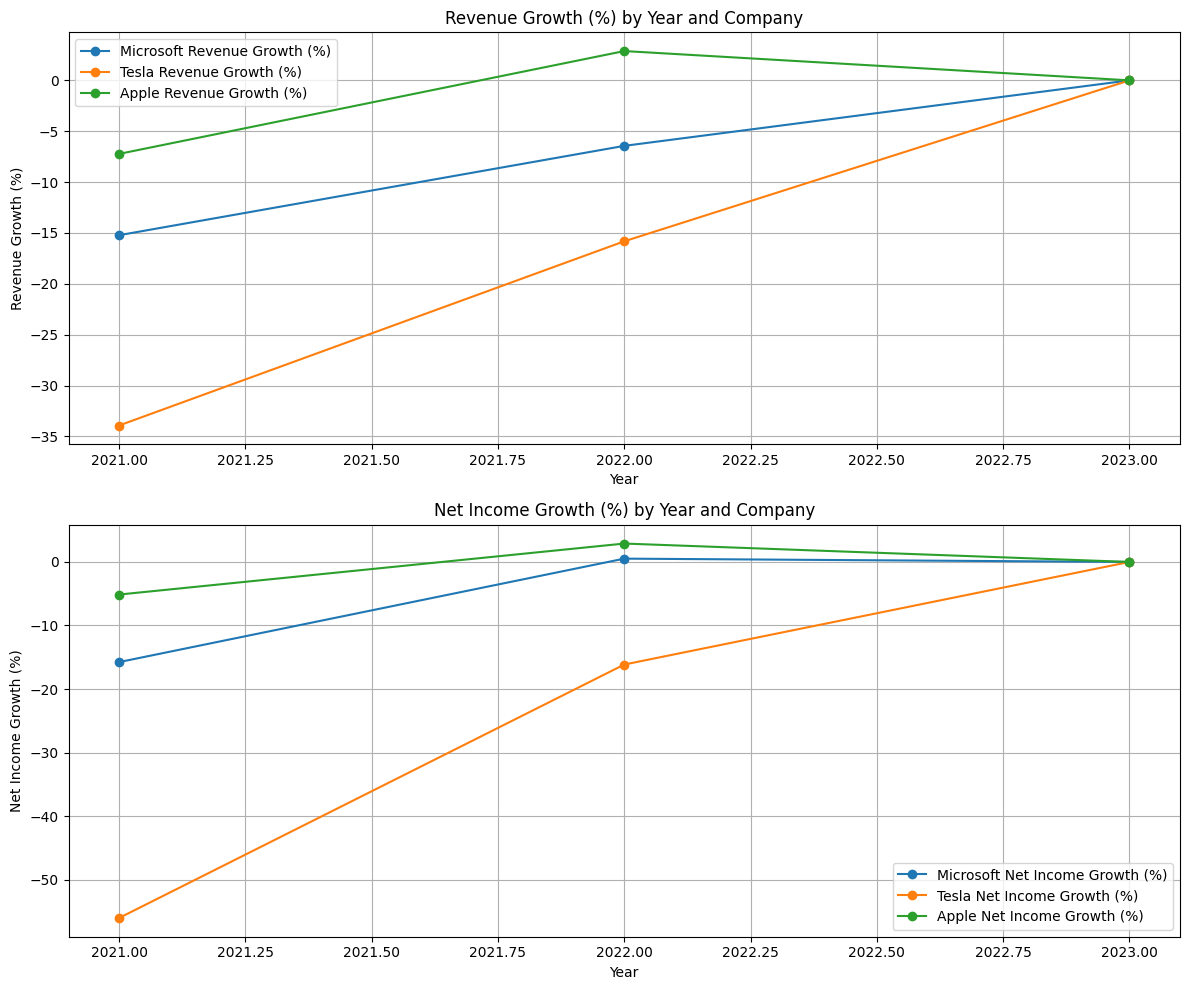

In [18]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Define metrics and titles for plotting
metrics = ['Revenue Growth (%)', 'Net Income Growth (%)']
titles = ['Revenue Growth (%) by Year and Company', 'Net Income Growth (%) by Year and Company']

# Loop through metrics to plot on respective axes
for i, metric in enumerate(metrics):
    for company in df['Company'].unique():
        company_df = df[df['Company'] == company]
        ax[i].plot(company_df['Year'], company_df[metric], marker='o', label=f'{company} {metric}')
    
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel(metric)
    ax[i].legend()
    ax[i].grid(True)

plt.tight_layout()
plt.show()


## Observations:


### Revenue Growth(%) by Company over year Analysis

The Revenue Growth(%) by Company and year analysis reveals the following trends in financial performance for Microsoft, Tesla, and Apple:

- **Microsoft:** The revenue growth has been steady with moderate increases year-over-year, reflecting a stable expansion in market presence and business operations.

- **Tesla:** Revenue growth has exhibited strong fluctuations, with periods of rapid increase followed by slower growth phases. It showcase the best growth compared to 2021 it has been climbing the ladder progressively.

- **Apple:** Revenue has shown consistent growth with minor fluctuations, highlighting Apple's strong market position and brand loyalty. However we are able to see that in 2023 the Revenue growth decreased then 2022, there might have incident which led to these.

### Net Income Growth (%) by Company over year Analysis

This analysis highlights the dynamic financial performance of each company over the years, showcasing their unique strategies and responses to market conditions.

- **Apple:** The Total Revenue growth shows a positive trend in 2022 but a decline in 2023. Net Income growth also declined in 2023, indicating potential challenges or changes in profitability.
  
- **Microsoft:** The Total Revenue grew steadily from 2022 to 2023, with a notable increase in 2022. However, Net Income growth was highly variable, with a significant drop in 2023.

- **Tesla:** Tesla experienced substantial revenue growth in 2022, with a significant 123.02% increase in Net Income. The growth rates for both metrics remained positive in 2023, though at a lower rate compared to 2022.

These insights provide a snapshot of how each company has performed over the fiscal years, highlighting periods of strong growth as well as areas of decline.


In [20]:
# save the updated files.
df.to_csv("Updated Datasheet.csv")